In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('iris.csv',header=(0))
data = data.dropna(axis = 'rows')
classes = np.array(pd.unique(data[data.columns[-1]]), dtype = str)

data = data.to_numpy()
x = data[:,0:-1]
y = data[:,-1]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
X = scaler.transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

p = 0.2
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = p, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_pred,y_test)
print("Acurácia: ",score)

Acurácia:  1.0


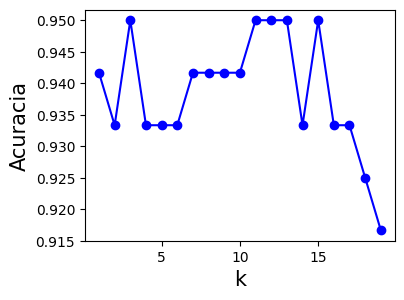

Melhor K:  3
Acuracia:  0.95


In [ ]:
from sklearn.model_selection import cross_validate
nkf = 5
vk = []
vscore = []

for k in range(1,20):
  model = KNeighborsClassifier(n_neighbors = k, metric = ('euclidean'))
  cv = cross_validate(model, x_train,y_train, cv=nkf)
  vscore.append(cv['test_score'].mean())
  vk.append(k)

plt.figure(figsize = (4,3))
plt.plot(vk, vscore, '-bo')
plt.xlabel('k',fontsize = 15)
plt.ylabel('Acuracia', fontsize = 15)
plt.show()

best_k = np.argmax(vscore)+1
print("Melhor K: ",best_k)
print("Acuracia: ",np.max(vscore))

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(solver = 'lbfgs',max_iter=1000)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Acuracia: ", model.score(x_test,y_test))

Acuracia:  1.0


In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Acurácia: ', model.score(x_test,y_test))

Acurácia:  1.0
